In [1]:
import pandas as pd
titanic = pd.read_csv('titanic.csv')

In [2]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
0,0.752896
1,0.205298


In [25]:
titanic.pivot_table('Survived',index='Sex',columns='Pclass')

Pclass,1,2,3
Sex,,,
0,0.963855,0.918919,0.460784
1,0.396040,0.151515,0.150198


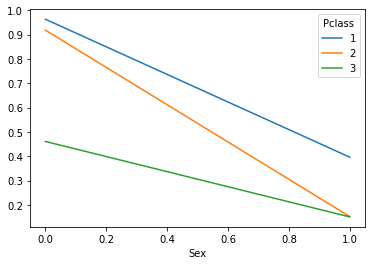

In [26]:
titanic.pivot_table('Survived',index='Sex',columns='Pclass').plot()

In [27]:
age = pd.cut(titanic['Age'],[0,18,80])

In [28]:
titanic.pivot_table('Survived',['Sex',age],'Pclass')

Pclass               1         2         3
Sex Age                                   
0   (0, 18]   0.909091  1.000000  0.511628
    (18, 80]  0.972222  0.900000  0.423729
1   (0, 18]   0.800000  0.600000  0.215686
    (18, 80]  0.375000  0.071429  0.133663

In [29]:
# Looking at all the values in each columns get a count
for val in titanic:
    print(titanic[val].value_counts())
    print()

0    424
1    288
Name: Survived, dtype: int64

3    355
1    184
2    173
Name: Pclass, dtype: int64

1    453
0    259
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

0    469
1    183
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64

0    519
1    110
2     68
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

13.0000    41
26.0000    30
8.0500     29
10.5000    24
7.8958     23
           ..
9.4750      1
13.4167     1
61.3792     1
14.1083     1
8.0292      1
Name: Fare, Length: 219, dtype: int64

2    554
0    130
1     28
Name: Embarked, dtype: int64



In [4]:
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [5]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
titanic = titanic.dropna(subset=['Embarked','Age'])

In [8]:
titanic.shape

(712, 8)

In [9]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
titanic.iloc[:,2] = labelencoder.fit_transform(titanic.iloc[:,2].values)
titanic.iloc[:,7] = labelencoder.fit_transform(titanic.iloc[:,7].values)

In [11]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [12]:
print(titanic['Sex'].unique())

[1 0]


In [13]:
print(titanic['Embarked'].unique())

[2 0 1]


In [14]:
# Splitting the data into independent X and dependent Y variables
X = titanic.iloc[:,1:8].values
Y = titanic.iloc[:,0].values

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [16]:
# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [17]:
# Creating functions with many machine learning algorithms
def models(X_train,Y_train):
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    knn.fit(X_train,Y_train)
    
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear',random_state=0)
    svc_lin.fit(X_train,Y_train)
    
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf',random_state=0)
    svc_rbf.fit(X_train,Y_train)
    
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train,Y_train)
    
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(X_train,Y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(X_train,Y_train)
    
    print('[0] Logistic Regression Training Accuracy: ',log.score(X_train,Y_train))
    print('[1] K Neighbours Classifier Training Accuracy: ',knn.score(X_train,Y_train))
    print('[2] SVC_RBF Training Accuracy: ',svc_rbf.score(X_train,Y_train))
    print('[3] SVC_LIN Training Accuracy: ',svc_lin.score(X_train,Y_train))
    print('[4] Gauss Training Accuracy: ',gauss.score(X_train,Y_train))
    print('[5] Decision Tree Classifier Training Accuracy: ',tree.score(X_train,Y_train))
    print('[6] Random Forest Classifier Training Accuracy: ',forest.score(X_train,Y_train))
    
    return log,knn,svc_lin,svc_rbf,gauss,tree,forest

In [18]:
model = models(X_train,Y_train)

[0] Logistic Regression Training Accuracy:  0.7978910369068541
[1] K Neighbours Classifier Training Accuracy:  0.8664323374340949
[2] SVC_RBF Training Accuracy:  0.8506151142355008
[3] SVC_LIN Training Accuracy:  0.7768014059753954
[4] Gauss Training Accuracy:  0.8031634446397188
[5] Decision Tree Classifier Training Accuracy:  0.9929701230228472
[6] Random Forest Classifier Training Accuracy:  0.9753954305799648


In [19]:
# Confusion mmatrix and accuracy for all of the models of the test data
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm = confusion_matrix(Y_test,model[i].predict(X_test))
    print(f"Confusion matrix for model {i}")
    print(cm)
    print()

Confusion matrix for model 0
[[75  7]
 [19 42]]

Confusion matrix for model 1
[[67 15]
 [20 41]]

Confusion matrix for model 2
[[70 12]
 [18 43]]

Confusion matrix for model 3
[[75  7]
 [22 39]]

Confusion matrix for model 4
[[69 13]
 [27 34]]

Confusion matrix for model 5
[[54 28]
 [12 49]]

Confusion matrix for model 6
[[73  9]
 [14 47]]



In [20]:
from sklearn.metrics import accuracy_score
for i in range(len(model)):
    accuracy = accuracy_score(Y_test,model[i].predict(X_test))
    print(f"The accuracy score for model {i}:")
    print(accuracy)
    print()

The accuracy score for model 0:
0.8181818181818182

The accuracy score for model 1:
0.7552447552447552

The accuracy score for model 2:
0.7902097902097902

The accuracy score for model 3:
0.7972027972027972

The accuracy score for model 4:
0.7202797202797203

The accuracy score for model 5:
0.7202797202797203

The accuracy score for model 6:
0.8391608391608392



# Model 6 seems to be the best model 

In [21]:
pred = model[6].predict(X_test)
print(pred)
print()
print(Y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


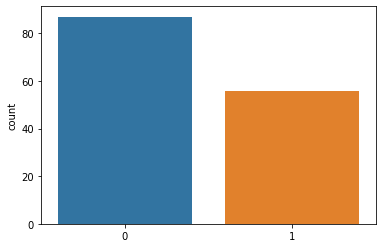

In [22]:
import seaborn as sn
sn.countplot(pred)


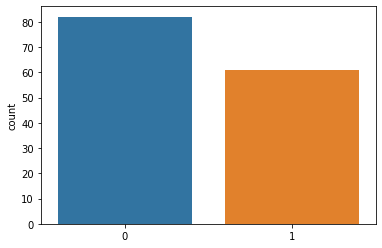

In [23]:
sn.countplot(Y_test)